# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [190]:
import pandas as pd
import numpy as np
import json
import requests as r
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tweepy

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
#Check number of rows and clumns in the dataset
df.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

##### Downloading the tweet image predictions programmatically

In [6]:
#Create a variable name for the file url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#Use r.get to download the url contents into the  "url" variable
requests = r.get(url)

In [7]:
#print (requests.content)

In [8]:
#Get file with the image predictions
with open ('image-predictions.tsv', 'wb') as file:
    file.write(requests.content)

In [9]:
#Load image data
tweet_img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [10]:
tweet_img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
tweet_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweet_img_pred.shape

(2075, 12)

##### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

### Reading the json file line by line

In [13]:
#Read json file line by line into df1 variable name
df1 = pd.read_json('tweet-json.txt', lines=True)

In [14]:
df1.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [15]:
df1 = df1[['id' , 'retweet_count', 'favorite_count']]

In [16]:
df1.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467


##### Alternatively

In [17]:
#Create an empty list to store json file line by line
lister = []

#write the tweet-json content to tweet-json.txt
with open ('tweet-json.txt', 'r') as file:
    for line in file:
        json_file = json.loads(line)
        lister.append(json_file)

In [18]:
#lister[0]

In [19]:
#Convert lister to a datframe
file_df = pd.DataFrame(lister, columns =['id', 'retweet_count', 'favorite_count'])

In [20]:
#Output varibles
file_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment and programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



##### <<< The first things to do is retain tweets with only original ratings, and drop tweets without images

In [21]:
#Create a new variable to hold rows containing only original tweets data
original_tweet  = df [df.retweeted_status_id.isnull()]
original_tweet.shape

(2175, 17)

In [22]:
#Drop rows where the first dog prediction was "FAlSE"
true_image_pred  = tweet_img_pred[tweet_img_pred['p1_dog'] == True]
true_image_pred['p1_dog'].unique()

array([ True])

##### Assessing the data visually and programmatically

## Assessing Visually

I first used Ms. Excel to sort, filter and view these datasets before randomly checking the datasets here

In [23]:
original_tweet.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
207,852553447878664193,NaN,NaN,2017-04-13 16:05:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jarod. He likes having his belly brush...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852553447...,13,10,Jarod,None,None,None,None
1816,676606785097199616,NaN,NaN,2015-12-15 03:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*screeches for a sec and then faints* 12/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676606785...,12,10,None,None,None,None,None


In [24]:
original_tweet.sort_values('name').sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
942,752917284578922496,NaN,NaN,2016-07-12 17:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Grizzie. She's a semi-submerged Bahrai...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752917284...,11,10,Grizzie,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None


In [25]:
original_tweet.sort_values('expanded_urls').sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1954,673656262056419329,NaN,NaN,2015-12-07 00:12:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert AKA King Banana Peel. He's a ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673656262...,10,10,Albert,None,None,pupper,None
1440,696886256886657024,NaN,NaN,2016-02-09 02:40:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys I found the dog from Up. 12/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696886256...,12,10,None,None,None,None,None


In [26]:
original_tweet.sort_values('timestamp')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [27]:
true_image_pred.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1948,862831371563274240,https://pbs.twimg.com/media/C_lkieeVwAAm0L4.jpg,2,Australian_terrier,0.207281,True,Irish_terrier,0.156296,True,German_shepherd,0.123536,True
1089,719332531645071360,https://pbs.twimg.com/media/CfuVGl3WEAEKb16.jpg,1,Dandie_Dinmont,0.224415,True,miniature_poodle,0.204882,True,Norfolk_terrier,0.090633,True


In [28]:
file_df.sample(2)

,id,retweet_count,favorite_count
2244,667878741721415682,127,409
374,828361771580813312,195,2408


## Assessing Programatically

In [13]:
file_df.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [31]:
file_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [32]:
file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [33]:
true_image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [34]:
true_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,1.532000e+03,1532.000000,1532.000000,1532.000000,1.532000e+03
mean,7.429474e+17,1.212794,0.613823,0.141327,6.180374e-02
std,6.863141e+16,0.574115,0.259735,0.102482,5.255780e-02
min,6.660209e+17,1.000000,0.044333,0.000023,2.160900e-07
25%,6.787998e+17,1.000000,0.390981,0.057067,1.540992e-02
50%,7.200513e+17,1.000000,0.614025,0.127964,4.995100e-02
75%,7.987548e+17,1.000000,0.850559,0.203748,9.527215e-02
max,8.921774e+17,4.000000,0.999956,0.467678,2.734190e-01


In [35]:
true_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1532 non-null   int64  
 1   jpg_url   1532 non-null   object 
 2   img_num   1532 non-null   int64  
 3   p1        1532 non-null   object 
 4   p1_conf   1532 non-null   float64
 5   p1_dog    1532 non-null   bool   
 6   p2        1532 non-null   object 
 7   p2_conf   1532 non-null   float64
 8   p2_dog    1532 non-null   bool   
 9   p3        1532 non-null   object 
 10  p3_conf   1532 non-null   float64
 11  p3_dog    1532 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 124.2+ KB


In [36]:
original_tweet.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   58
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [37]:
original_tweet.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.175000e+03,7.800000e+01,7.800000e+01,0.0,0.0,2175.000000,2175.000000
mean,7.371205e+17,7.455079e+17,2.014171e+16,NaN,NaN,13.215172,10.492874
std,6.748668e+16,7.582492e+16,1.252797e+17,NaN,NaN,47.725696,7.019084
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,0.000000
25%,6.768432e+17,6.757419e+17,3.086374e+08,NaN,NaN,10.000000,10.000000
50%,7.098528e+17,7.038708e+17,4.196984e+09,NaN,NaN,11.000000,10.000000
75%,7.894226e+17,8.257804e+17,4.196984e+09,NaN,NaN,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,1776.000000,170.000000


In [38]:
original_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [18]:
original_tweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Quality issues

1. Some 'expanded_urls' have their urls duplicated in the same observation. One unique url should be retained.

2. The 'name' column in 'original_tweet' contains names that are not of the dogs in the tweet: eg a, unacceptable etc

3. Columns 'p1, p2 and p3' in 'true_image_pred' consists of upper and lower cases, and hyphen and underscore characters

4. p1, p2 and p3 colummns in 'true_image_pred' contain 'false' values which appear irrelevant in the table.

5. Almost all the values of 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' in 'original_tweet' are missing

6. 'timestamp' in 'original_tweet' has a wrong data type

7. The 'in_reply_to_status_id' & 'in_reply_to_user_id' in 'original_tweet' have over 90% of its value missing

8. Some of the 'doggo',	'floofer',	'pupper' and 'puppo'columns have none as their values

### Tidiness issues

1. The three variables in the file_df data can be merged with the original_tweet dataset because it is part of the same observational unit as the data in the original_tweet data. 

2. The columns "doggo, floofer, pupper and puppo" should be merged because they do not each represent a unique observational unit.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make a copy of the original data for each piece

file_df_new = file_df.copy()
true_image_pred_new = true_image_pred.copy()
original_tweet_new = original_tweet.copy()


### Issue #1:

Some 'expanded_urls' have their urls duplicated in the same observation.

#### Define:

One unique url should be retained per observation

#### Code

In [30]:
original_tweet_new[['expanded_urls','Last']] = original_tweet_new.expanded_urls.str.split(",", n=1, expand=True)
original_tweet_new = original_tweet_new.drop('Last', axis=1)

#### Test

In [31]:
original_tweet_new.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
665,790698755171364864,NaN,NaN,2016-10-24 23:37:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mosby. He appears to be rather h*ckin ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790698755...,12,10,Mosby,None,None,None,None
1255,710609963652087808,NaN,NaN,2016-03-17 23:33:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I've watched this a million times and you prob...,NaN,NaN,NaN,https://vine.co/v/idaTpwH5TgU,12,10,None,None,None,None,None
1512,691321916024623104,NaN,NaN,2016-01-24 18:09:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Molly. She's a Peruvian Niddlewog. Lov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691321916...,11,10,Molly,None,None,None,None
1273,709207347839836162,NaN,NaN,2016-03-14 02:39:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's trying on her prom dress....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709207347...,11,10,Penny,None,None,None,None
1041,743980027717509120,NaN,NaN,2016-06-18 01:33:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Geno. He's a Wrinkled Baklavian Velvee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743980027...,11,10,Geno,None,None,None,None


### Issue #2:

The 'name' column in 'original_tweet' contains names that are not of the dogs in the tweet: eg a, unacceptable etc

#### Define

Replace other values in the name column with "NaN"

#### Code

In [32]:
original_tweet_new.name.mask(original_tweet_new.name.str.match(r'^[a-z\s]+$'), inplace=True)

#### Test

In [63]:
original_tweet_new['name']

### Issue #3:

Columns "p1, p2 and p3" in 'true_image_pred' consists of upper and lower cases, and hyphen and underscore characters

#### Define

i.   Format columns p1, p2 and p3 to lowercase, and change hyphen and space characters to underscore

#### Code

In [33]:
#Change to lower case and change all hypen,space to underscore

true_image_pred_new['p1'] = true_image_pred_new['p1'].str.lower().replace('-| ','_')
true_image_pred_new['p2'] = true_image_pred_new['p2'].str.lower().replace('-| ','_')
true_image_pred_new['p3'] = true_image_pred_new['p3'].str.lower().replace('-| ','_')

#### Test

In [35]:
true_image_pred_new.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
59,667119796878725120,https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg,1,pembroke,0.741563,True,chihuahua,0.057866,True,toy_poodle,0.039125,True
620,680473011644985345,https://pbs.twimg.com/media/CXGGlzvWYAArPfk.jpg,1,lakeland_terrier,0.796694,True,west_highland_white_terrier,0.138709,True,norwich_terrier,0.016253,True
13,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,pug,0.489814,True,bull_mastiff,0.404722,True,french_bulldog,0.048960,True


### Issue #4:

p1, p2 and p3 colummns contain 'false' values which appear irrelevant in the table.

# Define

Drop p1,p2,p3 observations with 'false' values

#### Code

In [36]:
true_image_pred_new = true_image_pred_new.drop(true_image_pred_new[(true_image_pred_new['p1_dog'] == False) |\
                           (true_image_pred_new['p2_dog'] == False) |\
                           (true_image_pred_new['p3_dog'] == False)].index)

#### Test

In [69]:
true_image_pred_new.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
725,686050296934563840,https://pbs.twimg.com/media/CYVXBb9WsAAwL3p.jpg,1,pomeranian,0.985789,True,keeshond,0.004083,True,pekinese,0.003334,True
1978,870656317836468226,https://pbs.twimg.com/media/DBUxSSTXsAA-Jn1.jpg,4,pembroke,0.945495,True,cardigan,0.045875,True,beagle,0.004329,True
801,691444869282295808,https://pbs.twimg.com/media/CZiBcJhWQAATXNK.jpg,2,bernese_mountain_dog,0.767563,True,border_collie,0.085805,True,entlebucher,0.043769,True
295,671357843010908160,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,italian_greyhound,0.831757,True,toy_terrier,0.043306,True,chihuahua,0.036773,True
1692,815990720817401858,https://pbs.twimg.com/media/C1L7OVVWQAIQ6Tt.jpg,1,chihuahua,0.428756,True,miniature_pinscher,0.103912,True,staffordshire_bullterrier,0.088959,True
850,695767669421768709,https://pbs.twimg.com/media/CafdAWCW0AE3Igl.jpg,1,soft-coated_wheaten_terrier,0.805139,True,lakeland_terrier,0.121662,True,afghan_hound,0.023303,True
1590,798644042770751489,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,english_springer,0.403698,True,brittany_spaniel,0.347609,True,welsh_springer_spaniel,0.137186,True
1209,742423170473463808,https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg,1,pug,0.997310,True,brabancon_griffon,0.001186,True,french_bulldog,0.000428,True
1661,811744202451197953,https://pbs.twimg.com/media/C0PlCQjXAAA9TIh.jpg,1,pekinese,0.386082,True,labrador_retriever,0.202862,True,golden_retriever,0.170487,True
1698,816816676327063552,https://pbs.twimg.com/media/C1XqbhXXUAElpfI.jpg,1,malamute,0.668164,True,pembroke,0.105033,True,siberian_husky,0.077875,True


### Issue #5:

Almost all the values of 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' in 'original_tweet' are missing

#### Define

Drop the three columns 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'

#### Code

In [37]:
original_tweet_new.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [25]:
original_tweet_new.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #6:

'timestamp' in 'original_tweet' has a wrong data type

#### Define

Change the datatype for 'timestamp' from object to datetime

#### Code

In [38]:
original_tweet_new['timestamp'] = pd.to_datetime(original_tweet_new['timestamp'])

#### Test

In [24]:
original_tweet_new['timestamp'].dtypes

datetime64[ns, UTC]

### Issue #7:


The 'in_reply_to_status_id' & 'in_reply_to_user_id' in 'original_tweet' have over 90% of its value missing

#### Define

Drop the two columns 'in_reply_to_status_id' & 'in_reply_to_user_id'

#### Code

In [39]:
original_tweet_new.drop(["in_reply_to_status_id","in_reply_to_user_id"], axis=1, inplace=True)

#### Test

In [40]:
original_tweet_new.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #8:

Some of the 'doggo', 'floofer',	'pupper' and 'puppo' columns have none as their values

#### Define

Replace all None in this columns with nan values

#### Code

In [41]:
# replace "None" with np.nan to indicate appropriate missing values
dogtypes = ['doggo', 'floofer', 'pupper', 'puppo']
original_tweet_new[dogtypes] = original_tweet_new[dogtypes].replace({'None':np.nan})

#### Test

In [42]:
original_tweet_new[['doggo', 'floofer', 'pupper', 'puppo']].head(5)

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


## Tidyness Issues

### Issue #9:

The three variables in the file_df_new data can be merged with the tweet_image_pred_new dataset because it is part of the same observational unit as the data in the tweet_image_pred data.

#### Define

Join the two tables on 'tweet_id'

#### Code

In [43]:
#Check the size of the two tables
print(file_df_new.shape)
print (true_image_pred_new.shape)

(2354, 3)
(1243, 12)


In [44]:
#rename the 'id' columnn to create a primary key to enable join between the two tables
file_df_new.rename(columns = {'id':'tweet_id'}, inplace = True)

In [45]:
#use pd.merge to join the tables

merged_image = pd.merge(file_df_new, true_image_pred_new)

In [46]:
merged_image.head()

,tweet_id,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891327558926688256,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
3,890729181411237888,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
4,890609185150312448,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True


In [47]:
# Check shape after merging. Some rows that could not be matched on tweet_id on the two tables have been dropped.
merged_image.shape

(1242, 14)

### Issue #10:

The columns "doggo, floofer, pupper and puppo" should be merged because they do not each represent a unique observational unit.

#### Define

The four columns can be merged as a single unit with the variable name 'dogs_category'

In [48]:
original_tweet_new.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [56]:
#Combine in a column
original_tweet_new['dogs_category'] = original_tweet_new[original_tweet_new.columns[8:]
                                                    ].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

#replace none values with nan
original_tweet_new['dogs_category'] = original_tweet_new['dogs_category'].replace('',np.nan)

#drop already merged columns
original_tweet_new.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#drop other dog categories and retain the first one
original_tweet_new['dogs_category'] = original_tweet_new['dogs_category'].map(lambda x: x.split(",")[0] if isinstance(x, str) else x)

In [58]:
original_tweet_new.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_category
988,748977405889503236,2016-07-01 20:31:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,https://twitter.com/dog_rates/status/748977405...,10,10,NaN,NaN
961,751132876104687617,2016-07-07 19:16:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo
57,881268444196462592,2017-07-01 21:49:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Elliot. He's a Canadian Forrest Pup. Unus...,https://twitter.com/dog_rates/status/881268444...,12,10,Elliot,NaN
470,816816676327063552,2017-01-05 01:20:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Timber. He misses Christmas. Specifica...,https://twitter.com/dog_rates/status/816816676...,12,10,Timber,NaN
304,836380477523124226,2017-02-28 01:00:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She just blasted off. Streamline ...,https://twitter.com/dog_rates/status/836380477...,12,10,Ava,pupper


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [69]:
gathered_assessed_cleaned = pd.merge(merged_image, original_tweet_new)
gathered_assessed_cleaned.to_csv('twitter_archive_master.csv')

In [76]:
#gathered_assessed_cleaned data
gathered_accessed_cleaned = pd.read_csv('twitter_archive_master.csv')
pd.set_option('display.max_columns', 50)
gathered_accessed_cleaned.head(5)

,Unnamed: 0,tweet_id,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_category
0,0,892177421306343426,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
1,1,891815181378084864,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
2,2,891327558926688256,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
3,3,890729181411237888,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
4,4,890609185150312448,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

Insights

1. Most used dog name
2. Average retweet count for dog categories
3. Dog category with the highest average favorite count
4. Image number with the highest count

### Insight 1

Most used dog name

In [215]:
gathered_accessed_cleaned.name.value_counts().head(10)

None       296
Cooper       9
Charlie      8
Oliver       7
Sadie        6
Koda         6
Leo          5
Lucy         5
Tucker       5
Toby         5
Name: name, dtype: int64

In [216]:
gathered_accessed_cleaned.name.count()

1148

In [217]:
gathered_accessed_cleaned.name.nunique()

633

### Insight 2

Average retweet count for dog categories

In [176]:
avg_retweet_count = gathered_accessed_cleaned['retweet_count'].mean()
avg_retweet_count1 = round(avg_retweet_count)
print('The average retweet count is:', avg_retweet_count1)
avg_retweet_count = gathered_accessed_cleaned.groupby('dogs_category')['retweet_count'].mean()
print (round(avg_retweet_count.sort_values(ascending=False)))

The average retweet count is: 2753
dogs_category
puppo      6818.0
doggo      6293.0
floofer    5379.0
pupper     2569.0
Name: retweet_count, dtype: float64


### Insight 3

Average favorite count by dog category

In [220]:
avg_favorite_count = gathered_accessed_cleaned.groupby('dogs_category')['favorite_count'].mean()
print (round(avg_retweet_count.sort_values(ascending=False)))

dogs_category
puppo      23238.0
doggo      18155.0
floofer    14394.0
pupper      8159.0
Name: favorite_count, dtype: float64


### Insight 4

Image number with the highest count

In [197]:
image_num = gathered_accessed_cleaned.groupby('img_num')['img_num'].count()
print (round(image_num.sort_values(ascending=False)))

img_num
1    1012
2     130
3      42
4      19
Name: img_num, dtype: int64


### Insights:

1. 680 dogs have no name. Lucy with 11 has the highest use

2. The average retweet count for dog categories is 2753

3. Puppo with 23238 is the dog category with the highest count

4. Image number 1 has the highest number of records with 1012 of 1203

### Visualization

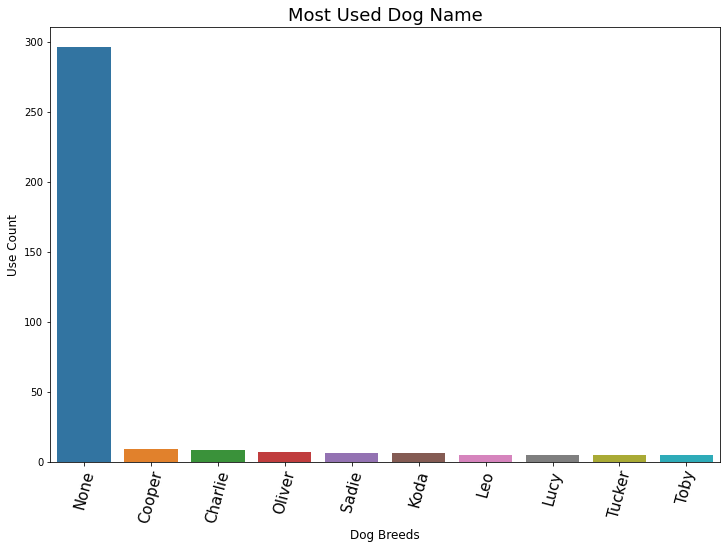

In [209]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x = gathered_accessed_cleaned.name.value_counts()[0:10].index,
            y = gathered_accessed_cleaned['name'].value_counts()[0:10],
            data = gathered_accessed_cleaned);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75, fontsize = 15);
plt.xlabel('Dog Breeds',fontsize = 12);
plt.ylabel('Use Count',fontsize = 12);
plt.title('Most Used Dog Name',fontsize = 18);

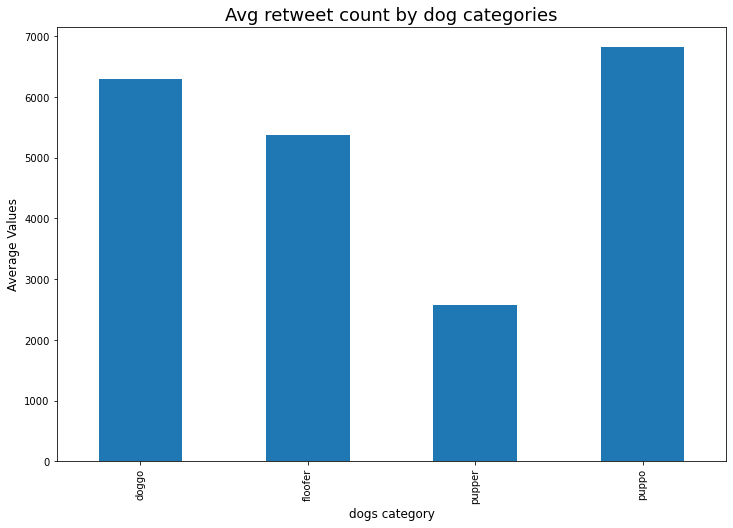

In [218]:
plt.figure(figsize = (12,8))
avg_retweet_count.plot(kind='bar');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75, fontsize = 15)
plt.title('Avg retweet count by dog categories', fontsize=18)
plt.xlabel('dogs category', fontsize=12)
plt.ylabel('Average Values', fontsize=12);

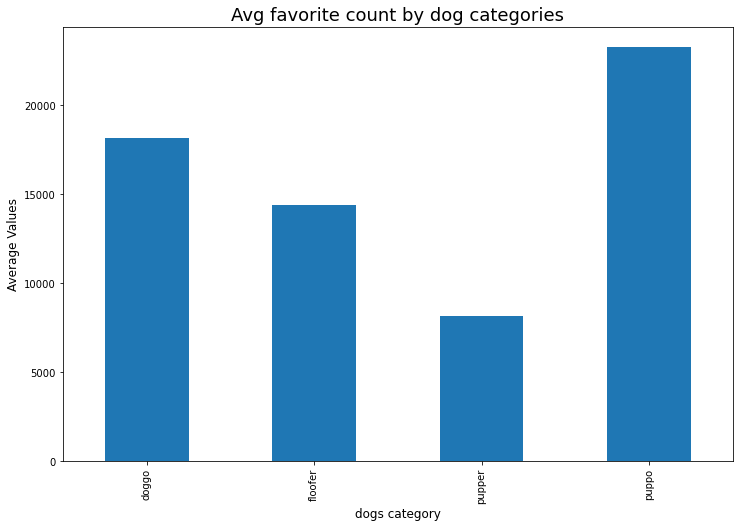

In [221]:
plt.figure(figsize = (12,8))
avg_favorite_count.plot(kind='bar');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75, fontsize = 15)
plt.title('Avg favorite count by dog categories', fontsize=18)
plt.xlabel('dogs category', fontsize=12)
plt.ylabel('Average Values', fontsize=12);

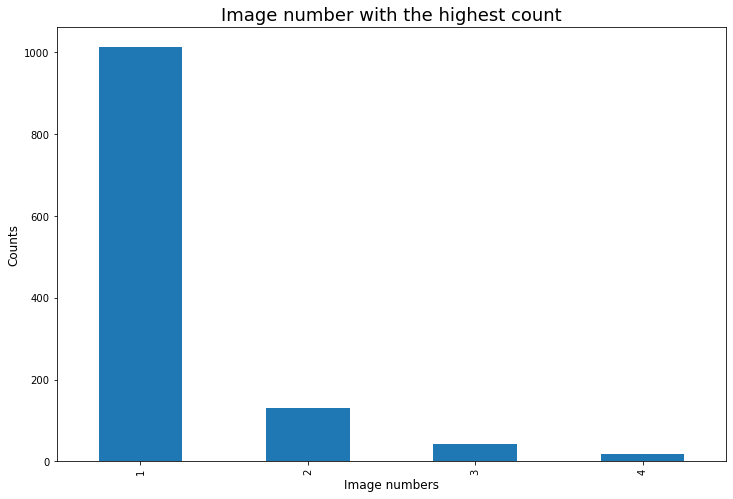

In [213]:
plt.figure(figsize = (12,8))
image_num.plot(kind='bar');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75, fontsize = 15)
plt.title('Image number with the highest count', fontsize=18)
plt.xlabel('Image numbers', fontsize=12)
plt.ylabel('Counts', fontsize=12);